In [120]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import iris
import iris.quickplot as qplt

In [121]:

def area_average(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        print 'cube already has latitude bounds'
    try:
        cube.coord('longitude').guess_bounds()
    except:
        print 'cube already has longitude bounds'
    grid_areas = iris.analysis.cartography.area_weights(cube)
    area_avged_cube = cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)
    return area_avged_cube

In [138]:
directory = '/data/BatCaveNAS/ph290/tmm/input_files/'
# mat_contents = sio.loadmat(directory + 'ProductivityForcing_sat.mat') # e.g. from /gpfs/ts0/home/ph290/TMM/tmm/tmm_matrices_data/MITgcm_2.8deg/GCM/ on isca

mat_contents = sio.loadmat(directory + 'ProductivityForcing_vary.mat') # e.g. from /gpfs/ts0/home/ph290/TMM/tmm/tmm_matrices_data/MITgcm_2.8deg/GCM/ on isca

In [139]:
print list(mat_contents)

['Prod_sat', '__version__', '__header__', 'Prod_cal', '__globals__']


(128, 64, 12)


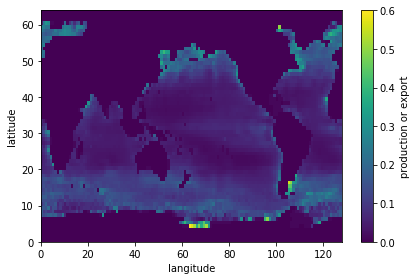

In [140]:
#can be plotted up with, e.g.:
variable = 'Prod_sat'
month = 0
print np.shape(mat_contents[variable])
array_shape = np.shape((mat_contents[variable]))
plt.pcolormesh(np.flipud(np.rot90(mat_contents[variable][:,:,month],1)))
plt.ylabel('latitude')
plt.xlabel('langitude')
cbar = plt.colorbar()
cbar.set_label('production or export')
plt.tight_layout()
plt.show()

In [141]:

time = iris.coords.DimCoord(range(0, 12, 1), standard_name='time', units='seconds')
latitude = iris.coords.DimCoord(range(-90, 90, 1), standard_name='latitude', units='degrees')
longitude = iris.coords.DimCoord(range(0, 360, 1), standard_name='longitude', units='degrees')
cube = iris.cube.Cube(np.zeros((12,180, 360), np.float32),standard_name='sea_surface_temperature', long_name='Sea Surface Temperature', var_name='tos', units='K',dim_coords_and_dims=[(time,0), (latitude, 1), (longitude, 2)])


caco3 global mean:  0.0005250248895414396
organic production mean:  0.008750414825690663
0.00010870738415550247


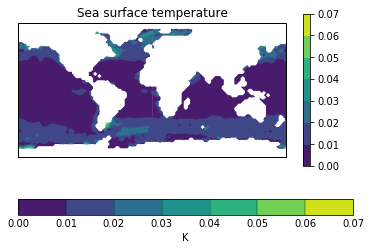

In [144]:

time = iris.coords.DimCoord(range(0, 12, 1), standard_name='time', units='seconds')
latitude = iris.coords.DimCoord(np.linspace(-90, 90, 64), standard_name='latitude', units='degrees')
longitude = iris.coords.DimCoord(np.linspace(0, 360, 128), standard_name='longitude', units='degrees')

cube_caco3 = iris.cube.Cube(np.zeros((12,64, 128), np.float32),standard_name='sea_surface_temperature', long_name='Sea Surface Temperature', var_name='tos', units='K',dim_coords_and_dims=[(time,0), (latitude, 1), (longitude, 2)])
cube_production = cube_caco3.copy()

variable = 'Prod_cal'
original_data = np.swapaxes(np.swapaxes(np.flipud(np.rot90(mat_contents[variable],1)),2,1),0,1)
original_data = np.ma.masked_where(original_data == 0.0,original_data)
cube_caco3.data = original_data

variable = 'Prod_sat'
original_data = np.swapaxes(np.swapaxes(np.flipud(np.rot90(mat_contents[variable],1)),2,1),0,1)
original_data = np.ma.masked_where(original_data == 0.0,original_data)
cube_production.data = original_data

qplt.contourf(cube_production[0])
plt.colorbar()
caco3_mean = np.mean(area_average(cube_caco3).data)
production_mean = np.mean(area_average(cube_production).data)
print 'caco3 global mean: ', caco3_mean 
print 'organic production mean: ',production_mean

mat_contents_out = mat_contents.copy()
mat_contents_out['Prod_sat'] *= 0.333
mat_contents_out['Prod_cal'] *= 0.333

print np.mean(mat_contents['Prod_cal'])

In [146]:
sio.savemat(directory + 'ProductivityForcing_vary_third.mat', mat_contents_out, format='5', long_field_names=False, do_compression=True, oned_as='row')

# Below are other fields for comparison. NOte different matlab version, so read in in a different way and not directly comparable

In [57]:
import h5py
filepath = directory + 'basin_mask.mat'
    
mat_contents = {}
f = h5py.File(filepath)
for k, v in f.items():
    mat_contents[k] = np.array(v)

In [58]:
list(mat_contents)

[u'bathy_basin_mask',
 u'y',
 u'#refs#',
 u'numBasins',
 u'basin_mask',
 u'x',
 u'z',
 u'basin_names']

In [59]:
np.shape(mat_contents['basin_mask'])

(64, 128)

(64, 128)


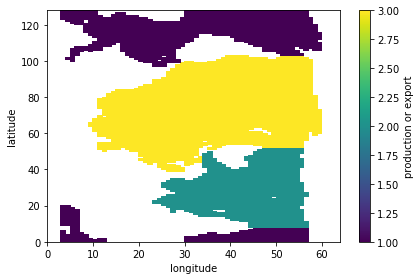

In [60]:
#can be plotted up with, e.g.:
variable = 'basin_mask'

print np.shape(mat_contents[variable])
array_shape = np.shape((mat_contents[variable]))
plt.pcolormesh(np.rot90(mat_contents[variable][:,:],3))
plt.ylabel('latitude')
plt.xlabel('longitude')
cbar = plt.colorbar()
cbar.set_label('production or export')
plt.tight_layout()
plt.show()

In [61]:
import h5py
filepath = directory + 'Salt_gcm.mat'
    
mat_contents = {}
f = h5py.File(filepath)
for k, v in f.items():
    mat_contents[k] = np.array(v)

In [62]:
list(mat_contents)

[u'Sgcm']

In [63]:
np.shape(mat_contents['Sgcm'])

(12, 15, 64, 128)

(12, 15, 64, 128)


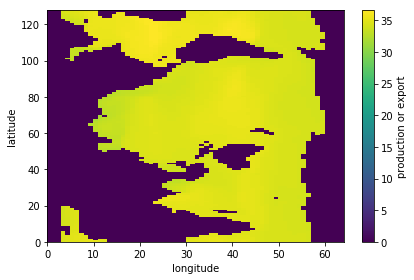

In [64]:
#can be plotted up with, e.g.:
variable = 'Sgcm'

print np.shape(mat_contents[variable])
array_shape = np.shape((mat_contents[variable]))
plt.pcolormesh(np.rot90(mat_contents[variable][0,0,:,:],3))
plt.ylabel('latitude')
plt.xlabel('longitude')
cbar = plt.colorbar()
cbar.set_label('production or export')
plt.tight_layout()
plt.show()

In [ ]:
# new dissolution profile:

#dissolution faction at each level if not at bottom of ocean
diss_prof = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0])
diss_prof_4d = np.tile(diss_prof, (array_shape[0],array_shape[1],array_shape[3],1))
diss_prof_4d  = np.moveaxis(diss_prof_4d, -1, -2)

#dissolution faction at each level if that level were the bottom of the ocean
bot_diss_prof = np.roll(1.0-np.cumsum(diss_prof),1)
bot_diss_prof[0]=1.0
bot_diss_prof_4d = np.tile(bot_diss_prof, (array_shape[0],array_shape[1],array_shape[3],1))
bot_diss_prof_4d  = np.moveaxis(bot_diss_prof_4d, -1, -2)

#plot the new dissolution field to check that it looks right

plt.pcolormesh(np.rot90(diss_prof_4d[80,:,:,0],3))
plt.ylim([15,1])
plt.ylabel('depth level')
plt.xlabel('latitude')
cbar = plt.colorbar()
cbar.set_label('fraction of dissolution')
plt.tight_layout()
plt.show(block = False)


#Save the new file: